# ASTR 792 Homework #2

#### Author: @aelieber1 | Due: Feb. 27th by 11:59 PM
Jupyter Notebook Executable File can be found: https://github.com/aelieber1/ASTR792_GregGalaxies
***

### Problem #1
a. Show that the Eddington luminosity for a black hole of mass M is equivalent to 2 × 10-9 Mc2 yr-1.

b. As a mass m of gas falls into a black hole, at most 0.1mc2 is likely to emerge as radiation; the rest is swallowed by the black hole. Exactly how much energy is release per piece of accreted mass depends on the detailed physics of the accretion disk but for most high accretion systems like quasars, the accreting material radiates 10% of its rest-mass energy. Assume a scenario where the black hole accretes matter such that the luminosity produced is at the Eddington limit and that accreted matter radiations as described above. Under this assumption, determine how many years it will take for the black hole’s mass to grow by a factor of e1.

## Problem #2
There is a list of galaxies below. I want you to go to the Sloan Digital Sky Survey web site at (https://skyserver.sdss.org/dr18). You should also look at the video at this link , which will show you how to query the web page to get the images. You should download the r-band image for each galaxy. It will download as a *.bz2 file, which you can open using bunzip2 <file>.fits.bz2
    
1. The galaxies are not necessarily located in the center of the image. Find the coordinates of each object and locate it in the image. Start by playing with the images. Display them with ds9 and play with different contrast options to see different amounts of detail. Also experiment with different ways to display the intensity data of the image. You can make plots of rows or columns, make contour plots, surface plots, etc. Just write a short description about what you tried, what worked best and worst, and why. The flux units of the pixels in the images are in nanomaggies, where 1 nanomaggy=3.631 x 10-6 Jy.


- NGC 2778
    - Type: E3
    - Recessional velocity: 1800
    - Coordinates: RA: 09:12:24 (138.1000); DEC: +35° 01'39" (35.0275)
    - PA: 46 deg
- NGC 3254
    - Type: SAbc
    - Recessional velocity: 1355
    - Coordinates: RA: 10 29 23.83 (157.3458); DEC: +29° 30' 6.70" (29.5019)
- NGC 4474
    - Type: S0 (edge-on)
    - Recessional velocity: 1455
    - Coordinates: RA: 12 29 53.53967 (187.4708); DEC: +14° 04' 06.88170" (14.0686)
- NGC 5055
    - Type: Sbc
    - Recessional velocity: 550
    - Coordinates: RA: 13h 15m 48s (198.9500); DEC: +42° 02' 06" (42.0350)
- NGC 5532
    - Type: S0 (edge-on)
    - Recessional velocity: 7106
    - Coordinates: RA: 14h 16m 52.9s (214.2208); DEC: +10°48'27" (10.8075)
    
I haven't used DS9 all that much (moreso use CARTA in my work), so it was a bit of a learning curve to get things working in DS9 and I'm not all that confident I did it correclty. I read through the AstroBites guide linked on your ASTR 592 Solution set which was helpful at understanding how it some of the basics work. 

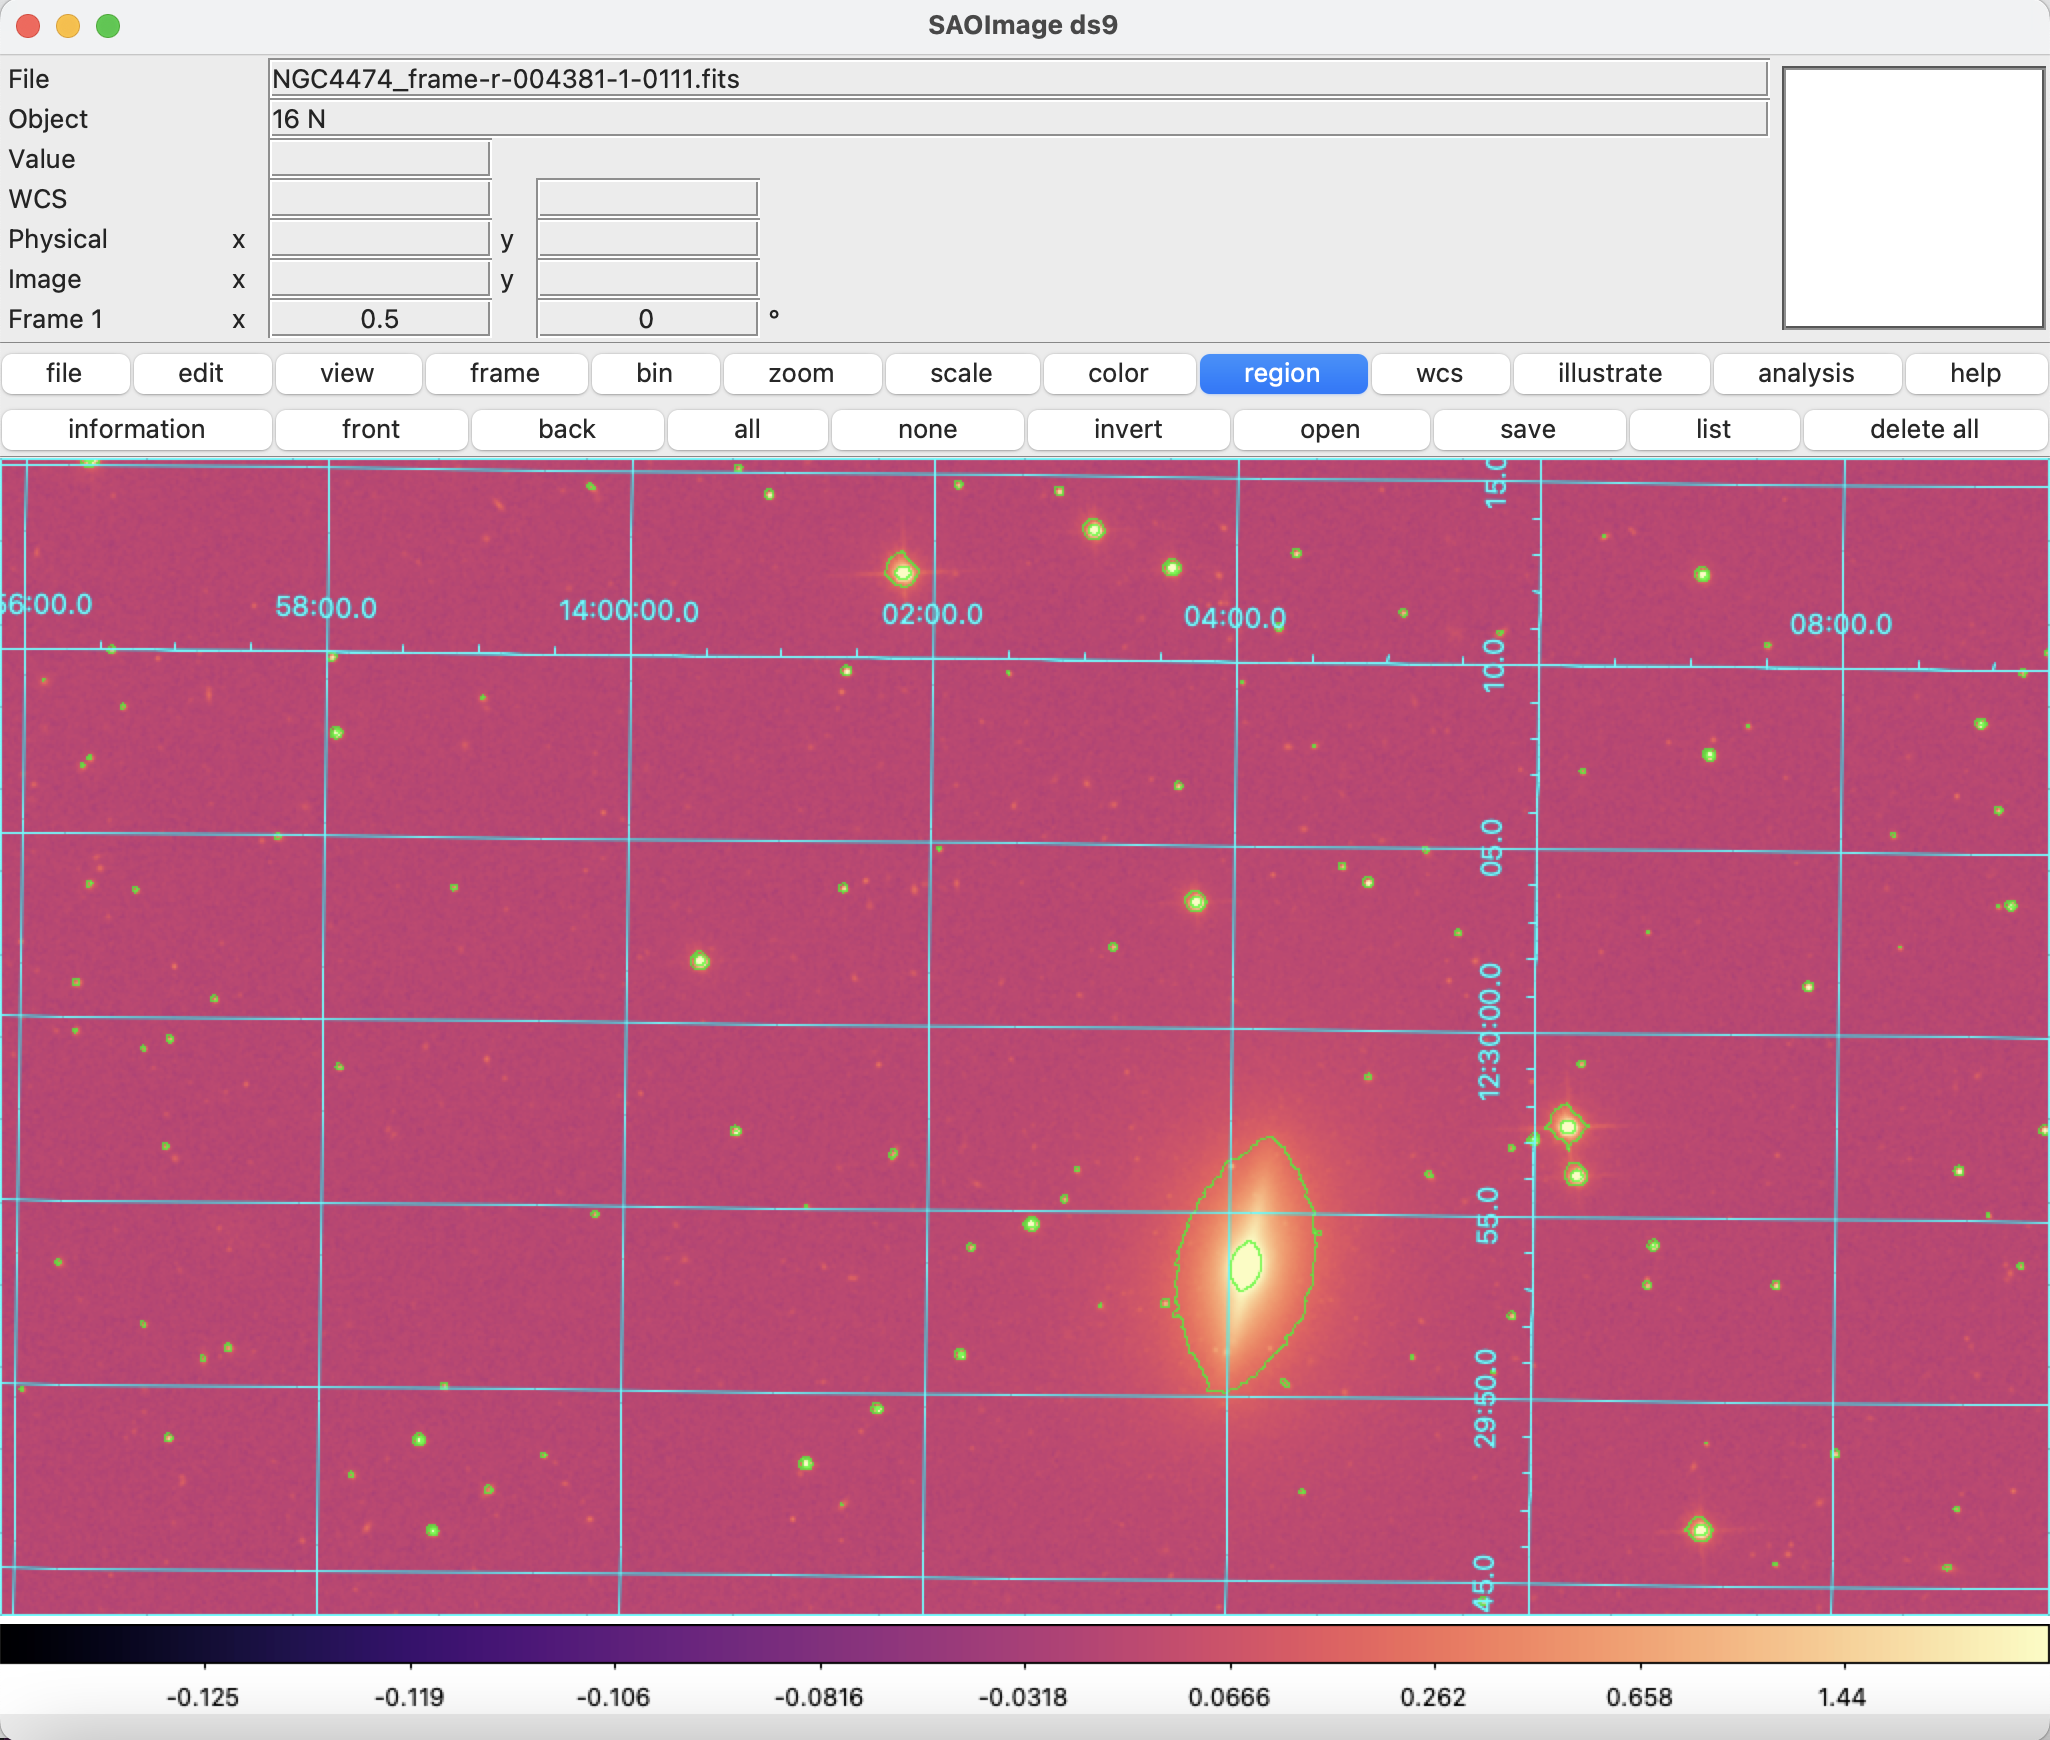
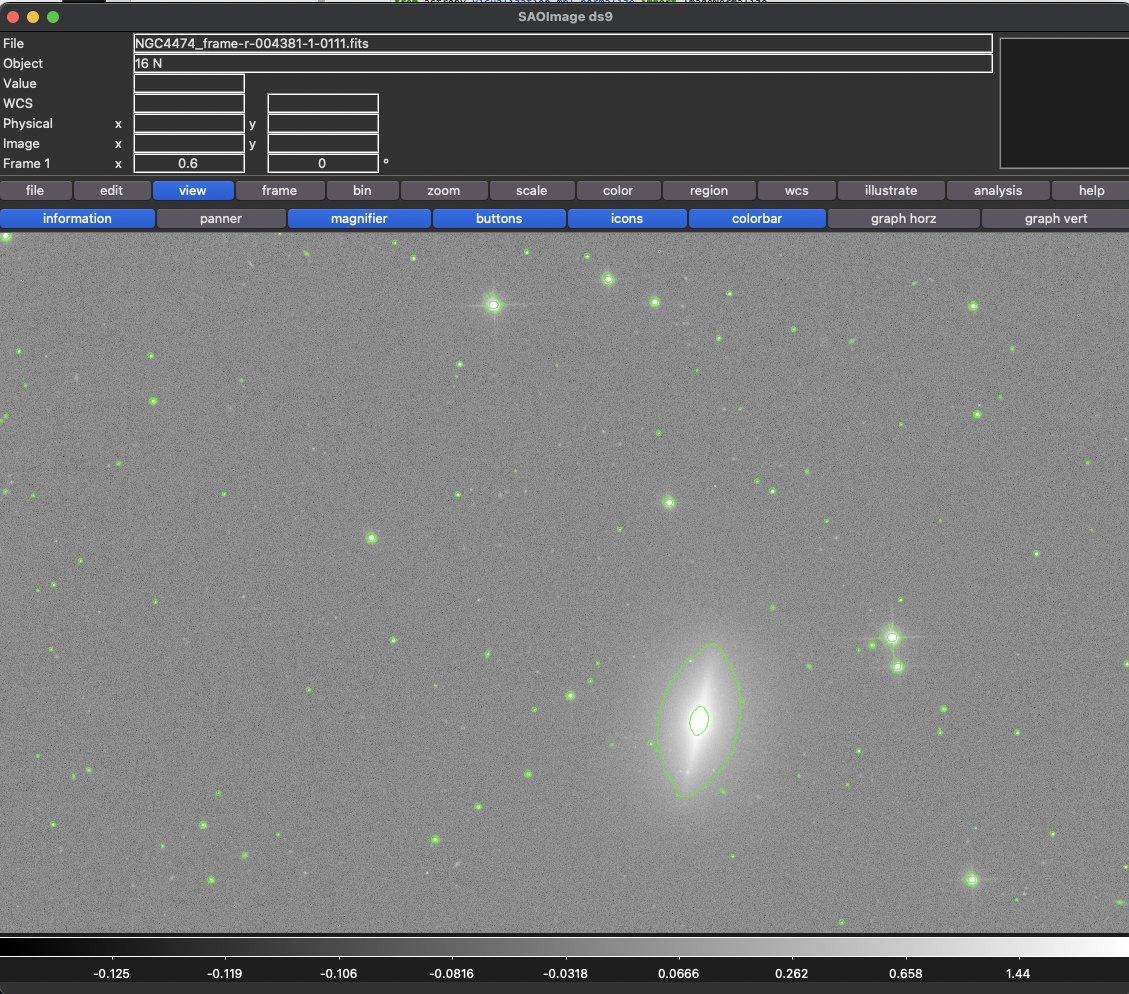


2. Select two of the galaxies, including at least one of the spirals and fit the luminosity profile. You should derive the following: 
    - i. luminosity profile, corrected to face-on orientation (for the disks).
    - ii. A fit to the profile using Sersic (1976) profiles. For disks assume an exponential (n=1). For bulges and spheroids assume an “r1/4”, or n=4, profile. For galaxies with both a disk and bulge you will need to fit both.
    - iii. scale lengths and/or effective radii in both arc seconds and kpc, assuming that galaxies are in the Hubble Flow or using independent distance information.
    - iv. For S0’s and spirals, the bulge/disk luminosity ratio
    
You are free to use whatever method you like for analyzing the profiles (2D ellipse fitting, 1D major or minor axis profiles, etc.) There are high-powered automated fitting routines in IRAF or as external packages e.g. GALFIT, and you can use those. But beware that these can be hard to use and very finicky regarding putting in the correct initial conditions. So simpler methods may be advantageous. There are a lot of tutorials on how to analyze images at this google doc. At that doc, the Photutils exercises will be of special interest, but there are also other useful tasks as well. There is also a Jupyter notebook that demonstrates surface photometry in elliptical apertures at this link. It was an exercise from my ASTR 596 Observational Astronomy class but starting a third of the way down in the problem 2 solutions and after that there are examples of how to do elliptical aperture photometry and plot light profiles.

These are just ideas. You can also do simpler things. I leave it up to you. The goal should be to get the assignment done with a reasonable answer, not to come up with the perfect method. Don’t try to do a sophisticated method if a more straightforward one will suffice.

Your writeup should include:
- The name of your object
- A plot or two showing the luminosity profile and a description of what you are showing
- Your fit to the luminosity profile, including all the relevant parameter values for that fit. Scale lengths and Re should be given in arcsec and kpc. For profiles with two components, e.g. bulge+disk, discuss how you decomposed them.
- A quantitative discussion of the uncertainties in the derived parameters.

You can hand this in as a python or Jupyter notebook or as a typed document with figures. If you
use a Jupyter Notebook you should be able to submit it directly to the assignment or you can
make a GitHub repository for this class, put it there, and include the repository address in your
assignment writeup.

The galaxies I will be analyzing are NGC 2778 and NGC 5055 to analyze an ellipitcal galaxy and a sprial galaxy. 

### i. luminosity profile, corrected to face-on orientation (for the disks)

The luminosity profile should show a decrease in luminosity or surface brightness as the radius increases. 

In [179]:
from photutils.aperture import ApertureStats
from photutils.aperture import EllipticalAnnulus, EllipticalAperture

In [178]:
# NGC 2778
galname = 'NGC2778'

#find the isophote that best corresponds to the half-light radius
#We will do this by computing the difference between the half-light radius
#and the semi-major axis of each isophote.  
diff = isolist[galname].sma - rhalfpix[galname]

#this returns the index of the isophote that is closes to the half-light radius
#We use this to set the ellipticity and PA of the isophotes
rhalfpixind = np.argmin(abs(diff))

#print(rhalfpix[galname],isolist[galname].sma[rhalfpixind])

#the magnitude zeropoint of the image, such that mag = -2.5 * log(flux) + magzp
magzp = header[galname]['MAGZERO']

#The pixel scale from the header converted from degrees to asec
pixscale = header[galname]['CD2_2'] * 3600.    #in asec/pix

#Go through every aperture and measure the surface brightness between it and the next most outer isophote
#initialize arrays for surface brightness and bin center
rcent = np.array([])
sbcent = np.array([])
sbcent_err = np.array([])
for aindx, a_out in enumerate(isolist[galname].sma):

    #skip the first isophote because I will always compute the values between the current isophote and the previous
    if aindx==0:
        a_in = 0.01

    if aindx>0:
        #create the inner and outer minor axes from the major axes and ellipticity
        b_out = a_out * isolist[galname].eps[rhalfpixind]
        b_in = a_in * isolist[galname].eps[rhalfpixind]

        #print(f'a_out = {a_out:.2f}; a_in ={a_in:.2f}; b_out ={b_out:.2f}; b_in ={b_in:.2f}')
        #set up elliptical annulus using parameters at rhalf
        annulus_aperture = EllipticalAnnulus((isolist[galname].x0[aindx],isolist[galname].y0[aindx]), 
                                             a_in, a_out, b_out, b_in = b_in,
                                             theta = isolist[galname].pa[rhalfpixind])
        aperstats = ApertureStats(data_bsub[galname],annulus_aperture)
        a_in = a_out

        #the central radius of each annulus in asec.  I'm appending each central radius to the existing array
        rcent = np.append(rcent, (a_in + a_out) / 2.*pixscale)
        #the average pixel flux within each annulus
        avflux = aperstats.mean
        #the standard deviation of the pixel values within each annulus
        stdflux = aperstats.std
        #the number of pixels in each annulus
        numpix = aperstats.sum_aper_area
        
        #****************************
        #your code here
        #the area of a pixel
        pixarea = pixscale**2
        #determine the average surface brightness in mag/asec^2.
        sbcent = np.append(sbcent, -2.5 * np.log10(avflux/pixarea) + magzp)
        # the uncertainty in the mean flux (this is not the standard deviation of all the pixels in the aperture).  
        # Check back to Homework 1
        avflux_err = stdflux/np.sqrt(numpix)
        avflux_err = avflux_err * u.pix   #this gets rid of the units on the flux error so that the next part works
        sbcent_err = np.append(sbcent_err, 1.086 * (avflux_err / avflux))

fig,ax = plt.subplots(figsize=(6, 6))

#plot the semi-major axis vs. magnitude
ax.errorbar(rcent, sbcent, yerr=sbcent_err, 
             fmt='o', markersize=4, color='black', label='SB profile')
ax.invert_yaxis()

plt.axvline(rhalfasec[galname], color='red', label='$r_{half}$')
ax.legend(fontsize=12)

ax.set_xlabel('$r_{semi-major~axis}$ [asec]',fontsize=16)
ax.set_ylabel('surface brightness [mag/asec$^2$]',fontsize=16)
plt.title(galname)

#calculate and print the surface brightness somewhere within 3 arcsec from the center.  
#Note that some of the inner values have NaNs because the isophote fitting failed there.  
#Just keep going out in index until you get a valid value
#***********************
#your code here
print(f'r = {rcent[30]:.3f} [asec]; surface brightness at r = {sbcent[30]:.3f}')

#calculate print out the surface brightness at the effective radius
#***********************
#your code here
print(f'r = {rcent[rhalfpixind]:.3f} [asec]; surface brightness at r = {sbcent[rhalfpixind]:.3f}')

#calculate and print out the ratio of the **flux** surface brightness between the center and at r_half
#***********************
#your code here
flux_rat = 10**(-0.4 * (sbcent[rhalfpixind] - sbcent[30]))
print(f'flux_SB(rhalf) / flux_SB(rcent) = {flux_rat:.3f}')

## Problem #3
Make an x-y plot of a “boxy” and “disky” isophote for an elliptical galaxy. This needs to be mathematically correct using the Fourier decomposition discussed in class. Make sure to
indicate the values of the Fourier coefficients that you adopt for the two cases. Compare each of these isophotes to a perfectly elliptical isophote. You can choose the amplitude of the boxiness and diskiness. I just want you to be able to plot isophotes as a fourier decomposition.

The deviation in radius from a perfect ellipse is described by: 
\begin{align}
    r_i = \sum_{j=0}^{N-1} \alpha_j cos(t_ij) + \beta_j sin(t_ij)
\end{align}

In [57]:
def plot_isophote_elliptical():
    #setting initial parameters
    h=0.0001
    a = 3
    b = 3
    
    #range of angle t with h as a step
    t = np.arange(0, 2 * np.pi+h, h)
    
    x = a * np.cos(t)
    y = b * np.sin(t)
    
    plt.plot(x,y,label='Ellipse')
    
    alpha = [0,0,0,0,-0.3]
    beta = [0,0,0,0,0]
    
    #radial deviation from pure ellipse
    r_off = 0
    for j in range(len(alpha)):
        r_off += (alpha[j] * np.cos(t * j)) + (beta[j] * np.sin(t * j))
        
    #plotting isophote
    x = x + r_off * np.cos(t)
    y = y + r_off * np.sin(t)

    plt.plot(x,y,label='Isophote')
    plt.legend()
    plt.title('Boxy Disk Isophote')
    
    plt.show
    
    return(print("Alpha Terms: " + str(alpha) + "; Beta Terms: " + str(beta)))

Alpha Terms: [0, 0, 0, 0, -0.3]; Beta Terms: [0, 0, 0, 0, 0]


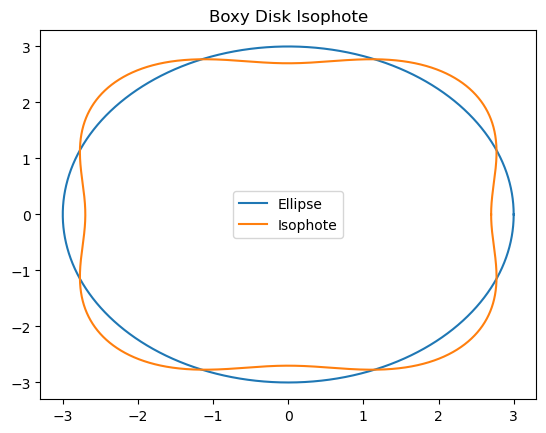

In [58]:
plot_isophote_elliptical()

In [55]:
def plot_disky_isophote_elliptical():
    #set initial parameters
    h=0.001
    a = 3
    b = 3
    
    #range of angles (0,2pi)
    t = np.arange(0, 2 * np.pi+h, h)
    
    x = a * np.cos(t)
    y = b * np.sin(t)
    
    plt.plot(x,y,label='Ellipse')
    
    #Setting Allpha and Beta Values
    alpha = [0,0,0,0,0.3]
    beta = [0,0,0,0,0]
    
    #Deviation from pure ellipse
    r_off = 0
    for j in range(len(alpha)):
        r_off += (alpha[j] * np.cos(t * j)) + (beta[j] * np.sin(t * j))
    
    #Plotting the Isophote
    x = x + r_off * np.cos(t)
    y = y + r_off * np.sin(t)

    plt.plot(x,y,label='Isophote')
    plt.legend()
    plt.title('Disky Disk Isophote')
    
    plt.show
    
    return(print("Alpha Terms: " + str(alpha) + "; Beta Terms: " + str(beta)))

Alpha Terms: [0, 0, 0, 0, 0.3]; Beta Terms: [0, 0, 0, 0, 0]


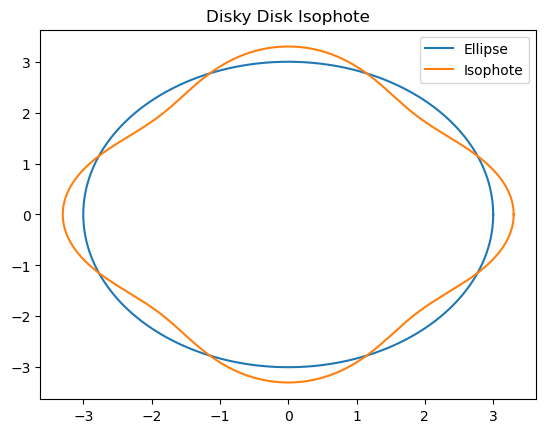

In [56]:
plot_disky_isophote_elliptical()

## Problem #4
Plot a Schechter (1976) luminosity function in log (Φ) vs. (L /L⊙) log for each possible
combination of the following combination of parameters:

- i. α=0, log(L*/L⊙) = 10, Φ* = 10-3 Mpc-3
- ii. α=-1, log(L*/L⊙) = 10, Φ* = 10-3 Mpc-3
- iii. α=-1.5, log(L*/L⊙) = 10, Φ* = 10-3 Mpc-3

You should plot these curves in python in a Jupyter Notebook and hand this notebook in
using the same instructions as in problem 2. I want to see your code as well.

The number density of galaxies $N$ with luminosities $L$ in a
cosmic volume $V$ is widely observed to follow the Schechter luminosity
function $\phi$:

\begin{align}\phi(L) = \frac{{\rm d}N}{{\rm d}L{\rm d}V} =
   \phi_*\left(\frac{L}{L_*}\right)^\alpha{\rm exp}\left[-\frac{L}{L_*}\right].\end{align}

The Schechter function is given by: 
    
\begin{align}
     \Phi(L)dL = \Phi^* (\frac{L}{L^*})^\alpha exp^(\frac{-L}{L^*}) d(\frac{L}{L^*})
\end{align}

We are given the inputs of $\alpha$, $log(L^*/L_{\odot})$, and $\Phi^* = 10^{-3} Mpc^{-3}$
From this we can gather than $L^* = 10^{10} L_{\odot}$

In [157]:
def phi_function(alpha, phi_star, L, Lstar):
    phi_func = phi_star * (L/Lstar)**alpha * np.exp(-L/Lstar)
    return phi_func

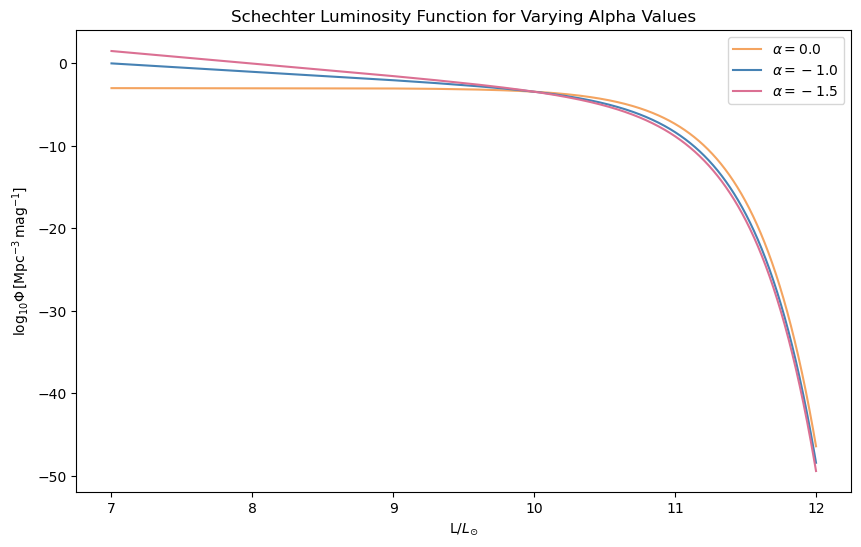

In [176]:
Lsun = 3.9e33 # ergs/sec
Lstar = 10**10
phi_star = 1e-3 

# Uniformly spaced values around Lstar which is our characteristic luminosity where the turnover shoudl happen 
#L = np.linspace(0.01*Lstar, 100*Lstar, num=1000)
L = np.linspace(10**7,10**12, num=1000)

a1 = 0.0
a2 = -1.0
a3 = -1.5

schech1 = phi_function(a1, phi_star, L, Lstar)
schech2 = phi_function(a2, phi_star, L, Lstar)
schech3 = phi_function(a3, phi_star, L, L_star)

plt.figure(figsize=(10,6))
plt.plot(np.log10(L), np.log10(schech1), label='$\\alpha = 0.0$', color='sandybrown')
plt.plot(np.log10(L), np.log10(schech2), label='$\\alpha = -1.0$', color='steelblue')
plt.plot(np.log10(L), np.log10(schech3), label='$\\alpha = -1.5$', color='palevioletred')
plt.xlabel('L/$L_{\odot}$')
plt.ylabel(r'$\log_{10} \Phi \, [\mathrm{Mpc}^{-3} \, \mathrm{mag}^{-1}]$')
plt.legend()
plt.title('Schechter Luminosity Function for Varying Alpha Values')
plt.show()

b. For each of the LFs above, make a plot of the total luminosity at ρL( > L) vs log (L /L⊙). You will need to do this numerically using Eq. 3.10 from the Cimatti textbook. Include each plot in your assignment as well as a comment on which galaxies - in terms of their log (L /L⊙) - contribute the most to the total luminosity of the population for each set of Schechter functions.

\begin{align}
    \rho_L(L>L_0) &= \int^\infty_{L_0} L\Phi(L) \\
                  &= \Phi^* L^* \Gamma (\alpha + 2, \frac{L_0}{L^*})
\end{align}

We know that mathematically the density should diverge is alpha is less than or equal to -2. This can easily be seen in by the gamma function in the solution. Gamma functions can only take positive values so based on our solution if alpha is less than or equal to negative 2, we will be inputting a negative parameter into the gamma function, causing divergence. 

Text(0.5, 1.0, 'Total Luminosity Density ($\\rho_L$$(L>L_0)$) vs. $L/L_{\\odot}$ ')

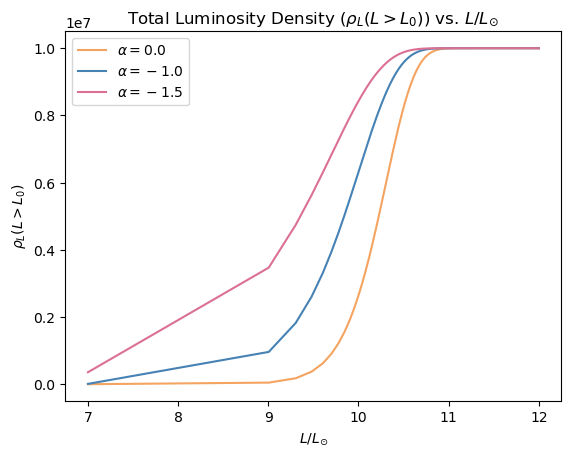

In [177]:
import scipy.special as sc

phi_stars = 1e-3 
L_star = 10**10 

#step = 0.01
#L_frac = np.arange(0.01,100+step,step)

lum_density_0 = phi_stars * L_star * sc.gammainc(a1 + 2, L/L_star)
lum_density_1 = phi_stars * L_star * sc.gammainc(a2 + 2, L/L_star)
lum_density_1_5 = phi_stars * L_star * sc.gammainc(a3 + 2, L/L_star)

plt.plot(np.log10(L), lum_density_0, label='$\\alpha = 0.0$', color='sandybrown')
plt.plot(np.log10(L), lum_density_1, label='$\\alpha = -1.0$', color='steelblue')
plt.plot(np.log10(L), lum_density_1_5, label='$\\alpha = -1.5$',color='palevioletred')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('$L/L_{\odot}$')
plt.ylabel(r'$\rho_L$' + '$(L>L_0)$')
plt.title("Total Luminosity Density (" + r'$\rho_L$' + '$(L>L_0)$)' + " vs. $L/L_{\odot}$ ")
